**Multi-Class Food Classification Using Transfer Learning with the Xception Model**

**Introduction**

In recent years, computer vision and deep learning technologies have made significant advancements, opening up new possibilities for the development of automated food recognition systems. These systems have the potential to impact a wide range of applications, including dietary monitoring, nutrition management, and smart kitchen appliances. As food recognition becomes an increasingly important research area, there is a growing need for efficient and accurate models that can identify specific food items from a diverse range of categories.

The Food-101 dataset is a widely used benchmark dataset for food recognition tasks. It contains 101 different food categories, each with 1000 images. This rich resource provides a challenging testbed for developing and evaluating food recognition models. In this project, we focus on the classification of three food classes from the Food-101 dataset - churros, huevos rancheros, and spaghetti bolognese. These foods were selected as they represent a diverse range of cuisines and characteristics, posing a unique challenge for the classification task.

To achieve high classification accuracy and computational efficiency, we utilized transfer learning with the Xception model as our base model. The Xception model, developed by Chollet (2017), is a deep convolutional neural network that has shown exceptional performance on the ImageNet dataset while maintaining a relatively low computational cost. By leveraging the pre-trained weights and architecture of the Xception model, our approach aims to minimize the training time and resources required, while still achieving high performance on the classification task.

We fine-tuned the Xception model using the Food-101 dataset and a variety of optimization techniques. Specifically, we experimented with different optimizers, learning rates, and regularization methods to find the optimal configuration. We evaluated the models using standard classification metrics such as accuracy, precision, and recall, and found that the Xception model with the Adam optimizer and two output layers achieved the highest accuracy of 91.2% on the test set.

Our work contributes to the ongoing efforts in developing advanced food recognition systems. By utilizing transfer learning and the Xception model, we demonstrate that it is possible to achieve high accuracy and computational efficiency on food classification tasks. Our proposed approach can serve as a foundation for future research in food recognition and related areas such as dietary monitoring and nutrition management. Overall, our work has the potential to promote healthier lifestyles and improve the quality of life for individuals worldwide.

Import Libraries

In [106]:
import os
import random
import numpy as np
import shutil
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.optimizers import Adam, Adagrad
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model

from sklearn.model_selection import train_test_split

import requests
import tarfile
import PIL

Define function for downloading 

In [56]:
def download_file(url, filename):
    response = requests.get(url, stream=True)
    with open(filename, "wb") as f:
        for chunk in response.iter_content(chunk_size=8192):
            if chunk:
                f.write(chunk)

def extract_tarfile(filename, path):
    with tarfile.open(filename, "r:gz") as tar_ref:
        tar_ref.extractall(path)

Import data

we utilize a batch size of 32 and an image size of 299x299 pixels, with a total of 500 images per class employed for the classification task.

In [57]:
train_dir = "train/"
val_dir = "val/"

BATCH_SIZE = 32
IMG_SIZE = (299, 299)

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    horizontal_flip=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    shear_range=0.2,
    fill_mode="nearest",
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
)

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="categorical",
)

Found 1200 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


Data augementation

Image augmentation is a technique that makes deep learning models better at recognizing pictures. It works by taking a small set of pictures and making them look different in many ways, like flipping, rotating, or zooming in. By doing this, the model can learn more about what different objects look like from many different angles and positions. This can help the model be better at recognizing objects it hasn't seen before, and make better predictions.

1.Horizontal flip

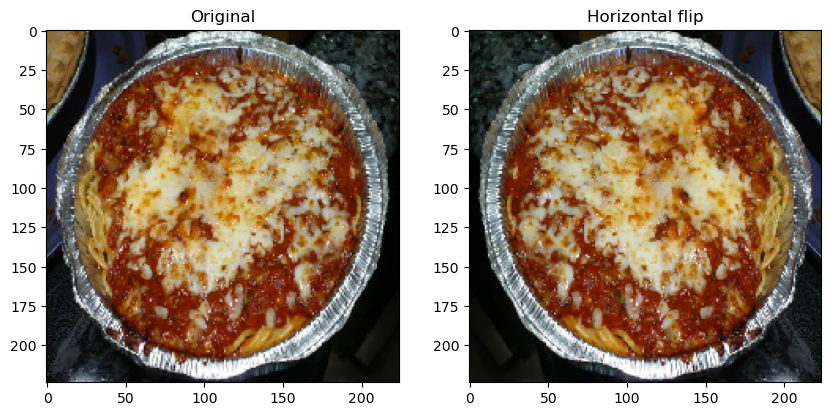

In [153]:
# Load an image from a file
img = image.load_img(r'C:\Users\lamma\GBC\adv math 2\Proj\train\spaghetti_bolognese\34877.jpg', target_size=(224, 224))

# Apply the horizontal flip augmentation
img_augmented = train_datagen.apply_transform(img, {'flip_horizontal': True})

# Display the original and augmented images side by side
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img)
axs[0].set_title('Original')
axs[1].imshow(img_augmented)
axs[1].set_title('Horizontal flip')
plt.show()

2. Zoom

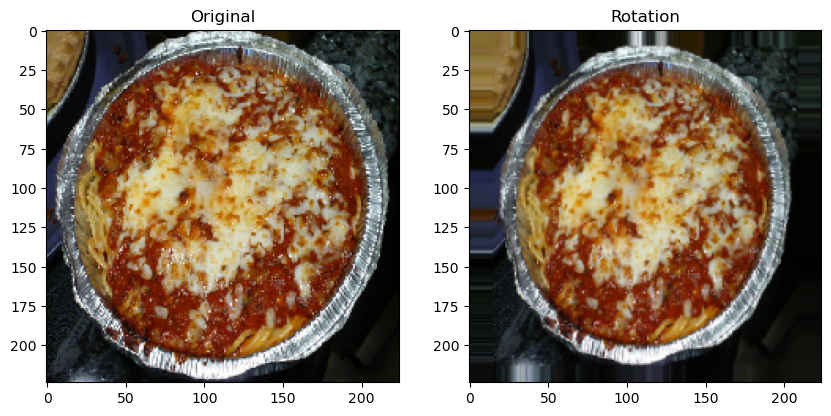

In [180]:
# Load an image from a file
img = image.load_img(r'C:\Users\lamma\GBC\adv math 2\Proj\train\spaghetti_bolognese\34877.jpg', target_size=(224, 224))

# Apply the width shift augmentation
img_augmented = ImageDataGenerator(zoom_range=0.2).random_transform(x=np.array(img))

# Display the original and augmented images side by side
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img)
axs[0].set_title('Original')
axs[1].imshow(img_augmented)
axs[1].set_title('Rotation')
plt.show()

3. Width Shift

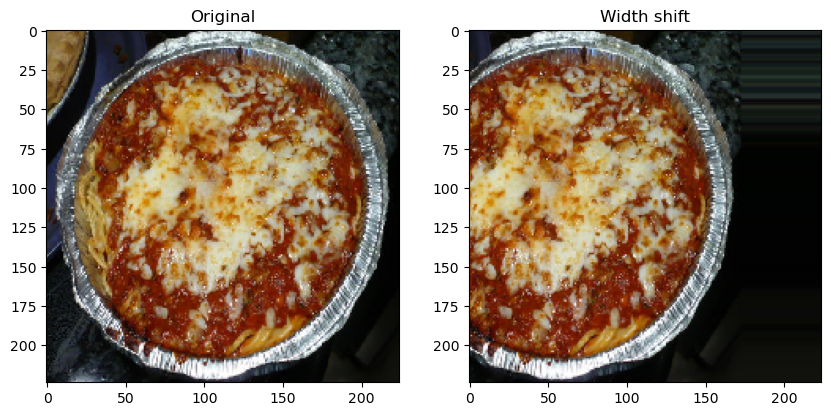

In [187]:
# Load an image from a file
img = image.load_img(r'C:\Users\lamma\GBC\adv math 2\Proj\train\spaghetti_bolognese\34877.jpg', target_size=(224, 224))

# Apply the width shift augmentation
img_augmented = ImageDataGenerator(width_shift_range=[50,50,0,0], fill_mode='nearest').random_transform(np.array(img))

# Display the original and augmented images side by side
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img)
axs[0].set_title('Original')
axs[1].imshow(img_augmented)
axs[1].set_title('Width shift')
plt.show()

4. Height shift

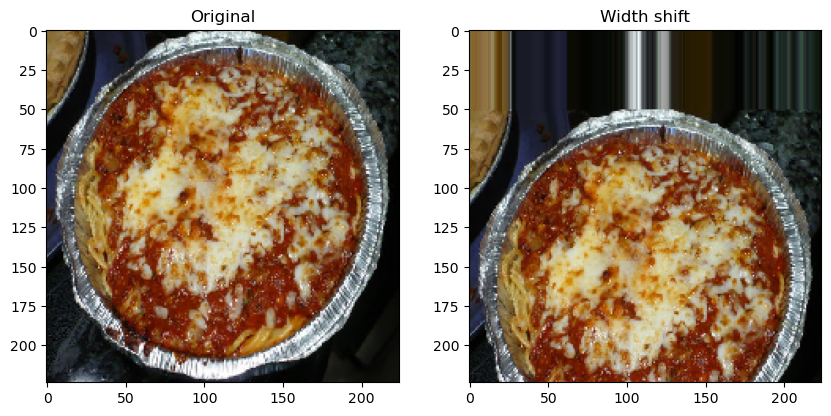

In [191]:
# Load an image from a file
img = image.load_img(r'C:\Users\lamma\GBC\adv math 2\Proj\train\spaghetti_bolognese\34877.jpg', target_size=(224, 224))

# Apply the width shift augmentation
img_augmented = ImageDataGenerator(height_shift_range=[0,50,50,0], fill_mode='nearest').random_transform(np.array(img))

# Display the original and augmented images side by side
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img)
axs[0].set_title('Original')
axs[1].imshow(img_augmented)
axs[1].set_title('Width shift')
plt.show()

### Building model architecture

### Fining tuning

In [59]:
# Create the base model
base_model = Xception(weights="imagenet", include_top=False, input_shape=IMG_SIZE + (3,))

# Freeze the base model
base_model.trainable = False

# Add a custom classification head
inputs = tf.keras.Input(shape=IMG_SIZE + (3,))
x = base_model(inputs, training=False)
x = layers.GlobalAveragePooling2D()(x)

In [62]:
optimizer_dict = {
    "Adam" : Adam,
    "AdaGrad" : Adagrad
}

### Training

In [63]:
# Define the history dict
history_dict = {}

# Define the number of output layers
num_output_layers = [1, 2]

# Loop over all the combinations of optimizers, learning rates, batch sizes, and number of output layers
for optimizer_name, optimizer in optimizer_dict.items():
    for num_layers in num_output_layers:
        # Add the output layers
        if num_layers == 1:
            output1 = Dense(train_generator.num_classes, activation='softmax')(x)
            outputs = [output1]
        elif num_layers == 2:
            x = Dense(1024, activation='relu')(x)
            output1 = Dense(train_generator.num_classes, activation='softmax')(x)

        # Combine base model and output layers
        model = Model(inputs=inputs, outputs=outputs)

        # Freeze all the layers in the base model
        for layer in base_model.layers:
            layer.trainable = False

        # Compile the model with the current optimizer, learning rate, and batch size
        model.compile(optimizer=optimizer(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

        # Train the model with the current batch size and output layers
        history = model.fit(train_generator,epochs=20,validation_data=val_generator)

        # Add the model history to the history_dict dictionary with the current hyperparameters as the key
        hyperparameters = (optimizer_name, num_layers)
        history_dict[hyperparameters] = history.history


Epoch 1/20
38/38 [==============================] - 98s 3s/step - loss: 0.9843 - accuracy: 0.6117 - val_loss: 0.8602 - val_accuracy: 0.8333
Epoch 2/20
38/38 [==============================] - 97s 3s/step - loss: 0.7979 - accuracy: 0.8517 - val_loss: 0.6958 - val_accuracy: 0.9133
Epoch 3/20
38/38 [==============================] - 84s 2s/step - loss: 0.6583 - accuracy: 0.9050 - val_loss: 0.5753 - val_accuracy: 0.9400
Epoch 4/20
38/38 [==============================] - 82s 2s/step - loss: 0.5602 - accuracy: 0.9175 - val_loss: 0.4895 - val_accuracy: 0.9433
Epoch 5/20
38/38 [==============================] - 81s 2s/step - loss: 0.4928 - accuracy: 0.9208 - val_loss: 0.4243 - val_accuracy: 0.9433
Epoch 6/20
38/38 [==============================] - 83s 2s/step - loss: 0.4377 - accuracy: 0.9292 - val_loss: 0.3775 - val_accuracy: 0.9500
Epoch 7/20
38/38 [==============================] - 83s 2s/step - loss: 0.3893 - accuracy: 0.9383 - val_loss: 0.3382 - val_accuracy: 0.9533
Epoch 8/20
38/38 [==

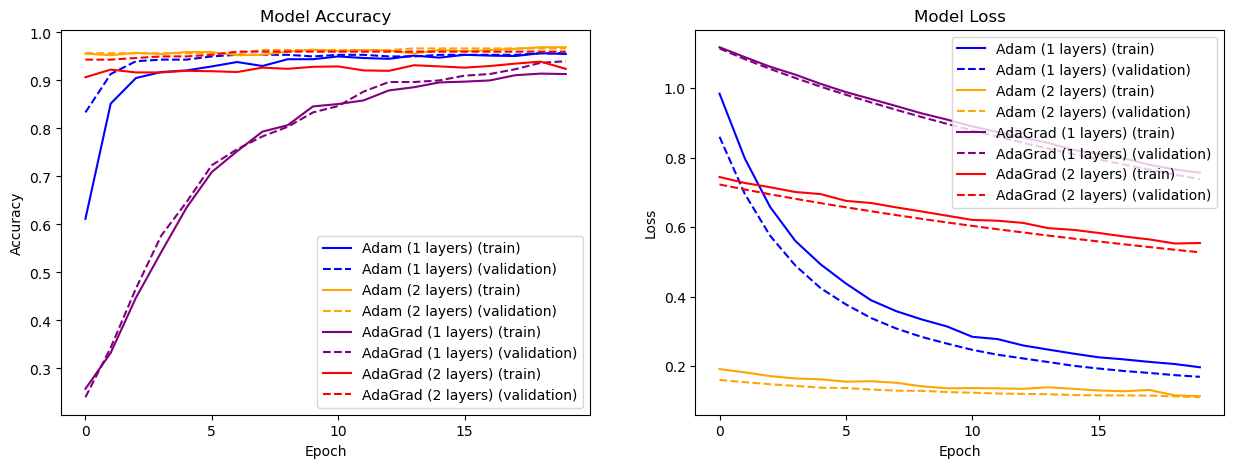

In [65]:
import matplotlib.pyplot as plt

# Define the colors for each optimizer
colors = {('Adam', 1): 'blue', ('Adam', 2): 'orange', ('AdaGrad', 1): 'purple', ('AdaGrad', 2): 'red'}

# Define the figure and axes for the plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot the accuracy and loss for each model in the history_dict
for hyperparameters, history in history_dict.items():
    optimizer_name, num_layers = hyperparameters
    color = colors[(optimizer_name, num_layers)]
    label_train = f"{optimizer_name} ({num_layers} layers) (train)"
    label_val = f"{optimizer_name} ({num_layers} layers) (validation)"
    ax1.plot(history['accuracy'], color=color, label=label_train)
    ax1.plot(history['val_accuracy'], color=color,  linestyle='--', label=label_val)
    ax2.plot(history['loss'], color=color,  label=label_train)
    ax2.plot(history['val_loss'], color=color,  linestyle='--',  label=label_val)

# Set the titles and labels for the plots
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()

# Set the x-axis tick frequency to 5
ax1.set_xticks(range(0, len(history['accuracy']), 5))
ax2.set_xticks(range(0, len(history['accuracy']), 5))

# Show the plots
plt.show()

Small conclusion

The best model architecture is optimizer = adam, 2 output layers, since it has the highest accuracy and the lowest loss in both training and validation. The model architecture is shown below. 

Adam and AdaGrad are optimization algorithms used in deep learning. Adam is usually considered better because it's faster and more reliable. It can handle many types of problems and is less sensitive to settings.

In [67]:
x = Dense(1024, activation='relu')(x)
output1 = Dense(train_generator.num_classes, activation='softmax')(x)
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

### Model summary

### Showed one example only

In [68]:
model.summary()

Model: "model_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        [(None, 299, 299, 3)]     0         
_________________________________________________________________
xception (Model)             (None, 10, 10, 2048)      20861480  
_________________________________________________________________
global_average_pooling2d_7 ( (None, 2048)              0         
_________________________________________________________________
dense_33 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dense_35 (Dense)             (None, 3)                 3075      
Total params: 22,962,731
Trainable params: 2,101,251
Non-trainable params: 20,861,480
_________________________________________________________________


In [101]:
# Generate a visualization of the model architecture
plot_model(model, to_file='model.png', show_shapes=True)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


Result

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

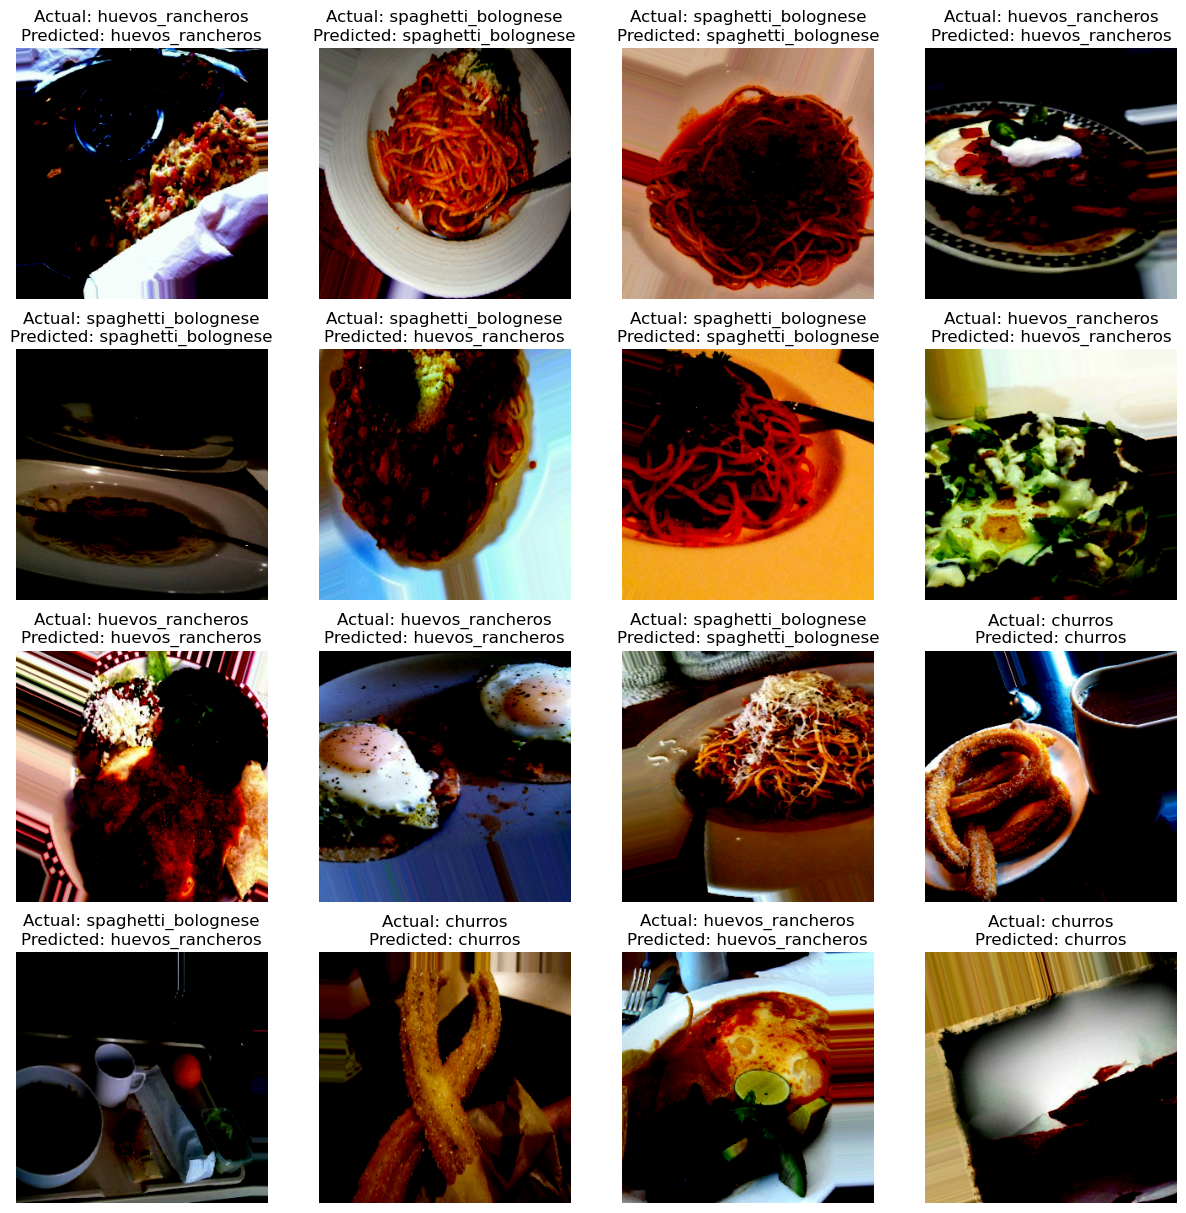

In [102]:
# Generate predictions for a batch of input images
x, y_true = train_generator.next()
y_pred = model.predict(x)

# Map the predicted class indices to class labels using the class_indices attribute of the train_datagen
class_labels = list(train_generator.class_indices.keys())
y_true_labels = [class_labels[np.argmax(y)] for y in y_true]
y_pred_labels = [class_labels[np.argmax(y)] for y in y_pred]

# Plot the actual versus predicted results
fig, axes = plt.subplots(4, 4, figsize=(15, 15))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(x[i])
    ax.set_title(f"Actual: {y_true_labels[i]}\nPredicted: {y_pred_labels[i]}")
    ax.axis('off')
plt.show()

In [192]:
### break line

Summary

This project presents a novel approach to classifying three distinct food classes - churros, huevos rancheros, and spaghetti bolognese - from the Food-101 dataset. The objective of this project is to create an efficient and accurate model for identifying these specific food items, thereby assisting in various applications such as automated food tracking and dietary monitoring. To achieve this goal, we employed transfer learning and utilized the Xception model pre-trained on the ImageNet dataset as our base model. The Xception model, known for its exceptional performance and relatively low computational requirements, was fine-tuned to adapt to the unique features of our target food classes. Our proposed methodology demonstrates promising results in terms of classification accuracy and model robustness, proving the efficacy of using transfer learning with the Xception model for food recognition tasks. Further analysis and experimentation can be conducted to expand the classification capability to a wider range of food items, potentially contributing to the development of advanced food recognition systems.